# SMS spam classification using NLP

In [39]:
import pandas as pd
import nltk

In [40]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [41]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [42]:
df.shape

(5572, 5)

In [43]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [44]:
df.rename(columns={'v1': 'class', 'v2': 'sms'}, inplace=True)
df.sample(5)

,class,sms
3183,ham,Good morning pookie pie! Lol hope I didn't wak...
1866,ham,Or Ì_ go buy wif him then i meet Ì_ later can?
1686,spam,todays vodafone numbers ending with 0089(my la...
10,ham,I'm gonna be home soon and i don't want to tal...
2530,ham,So the sun is anti sleep medicine.


In [45]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [46]:
df = df.drop_duplicates(keep="first")

In [47]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

# Data Vizualization

In [48]:
df["Length"] = df["sms"].apply(len)

In [49]:
df.head(2)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

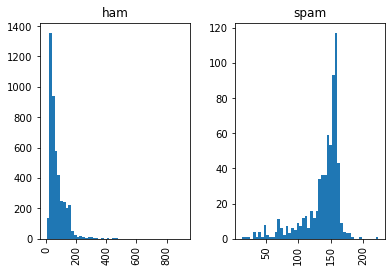

In [50]:
df.hist(column='Length', by='class', bins=50)

# Preprocessing

In [51]:
from nltk.stem.porter import PorterStemmer

nltk.download("stopwords")
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Preprocessing Tasks:
    Lower case
    Tokenization
    Removing special characters
    Removing stop words
    Stemming

In [52]:
import string

def clean_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [53]:
df["sms_cleaned"] = df["sms"].apply(clean_text)

In [54]:
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


# Feature extraction

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tf_vec = TfidfVectorizer(max_features=1000)
X = tf_vec.fit_transform(df["sms_cleaned"]).toarray()

In [62]:
X.shape

(5169, 1000)

In [59]:
Y = df["class"].values

# Learning

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [68]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.9777562862669246
